<font size="6"><b>Analysis</b></font>

<font size="4">Load the required libraries.</font>

In [1]:
library(oligo)
library(biomaRt)
library(data.table)
library(stringr)
library(dplyr)
library(ggplot2)
library(ggrepel)
library(qusage)
library(limma)

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: oligoClasses

Welcome to oligoClasses version 1.52.0

Loading required package: Biobase



<font size="4">Set the working directory and list the data files.</font>

In [2]:
# Data directory
setwd('/home/mario/Projects/holmes_analysis/data')

# Read data
cel_files <- list.files(path = getwd(), pattern = '*.CEL.gz', full.names = TRUE)

# Set working directory
setwd('/home/mario/Projects/holmes_analysis')

<font size="4">Load the data and perform data normalisation RMA.</font>

In [3]:
# Load data
parsed_cels <- oligo::read.celfiles(cel_files, verbose = TRUE)  

# Background correction of the microarrays
parsed_cels_rma <- oligo::rma(parsed_cels, normalize = TRUE, background = TRUE)  

# Obtain the expression matrix
expression_data <- parsed_cels_rma@assayData$exprs
expression_data <- as.data.frame(expression_data)
expression_data$affy_mouse430_2 <- rownames(expression_data) 
expression_data <- expression_data[, c(21, 1:20)]
rownames(expression_data)  <- NULL

# Print expression matrix
head(expression_data)

Loading required package: pd.mouse430.2

Loading required package: RSQLite

Loading required package: DBI

Platform design info loaded.



Reading in : /home/mario/Projects/holmes_analysis/data/GSM1537848_MA75_Dusp5_WT_Untreated_Mouse430v2.CEL.gz
Reading in : /home/mario/Projects/holmes_analysis/data/GSM1537849_MA76_Dusp5_WT_Untreated_Mouse430v2.CEL.gz
Reading in : /home/mario/Projects/holmes_analysis/data/GSM1537850_MA77_Dusp5_WT_Untreated_Mouse430v2.CEL.gz
Reading in : /home/mario/Projects/holmes_analysis/data/GSM1537851_MA78_Dusp5_WT_Untreated_Mouse430v2.CEL.gz
Reading in : /home/mario/Projects/holmes_analysis/data/GSM1537852_MA79_Dusp5_WT_Untreated_Mouse430v2.CEL.gz
Reading in : /home/mario/Projects/holmes_analysis/data/GSM1537853_MA80_Dusp5_KO_Untreated_Mouse430v2.CEL.gz
Reading in : /home/mario/Projects/holmes_analysis/data/GSM1537854_MA81_Dusp5_KO_Untreated_Mouse430v2.CEL.gz
Reading in : /home/mario/Projects/holmes_analysis/data/GSM1537855_MA82_Dusp5_KO_Untreated_Mouse430v2.CEL.gz
Reading in : /home/mario/Projects/holmes_analysis/data/GSM1537856_MA83_Dusp5_KO_Untreated_Mouse430v2.CEL.gz
Reading in : /home/mario/Pro

,affy_mouse430_2,GSM1537848_MA75_Dusp5_WT_Untreated_Mouse430v2.CEL.gz,GSM1537849_MA76_Dusp5_WT_Untreated_Mouse430v2.CEL.gz,GSM1537850_MA77_Dusp5_WT_Untreated_Mouse430v2.CEL.gz,GSM1537851_MA78_Dusp5_WT_Untreated_Mouse430v2.CEL.gz,GSM1537852_MA79_Dusp5_WT_Untreated_Mouse430v2.CEL.gz,GSM1537853_MA80_Dusp5_KO_Untreated_Mouse430v2.CEL.gz,GSM1537854_MA81_Dusp5_KO_Untreated_Mouse430v2.CEL.gz,GSM1537855_MA82_Dusp5_KO_Untreated_Mouse430v2.CEL.gz,GSM1537856_MA83_Dusp5_KO_Untreated_Mouse430v2.CEL.gz,⋯,GSM1537858_MA85_Dusp5_WT_IL-33_4hrs_Mouse430v2.CEL.gz,GSM1537859_MA86_Dusp5_WT_IL-33_4hrs_Mouse430v2.CEL.gz,GSM1537860_MA87_Dusp5_WT_IL-33_4hrs_Mouse430v2.CEL.gz,GSM1537861_MA88_Dusp5_WT_IL-33_4hrs_Mouse430v2.CEL.gz,GSM1537862_MA89_Dusp5_WT_IL-33_4hrs_Mouse430v2.CEL.gz,GSM1537863_MA90_Dusp5_KO_IL-33_4hrs_Mouse430v2.CEL.gz,GSM1537864_MA91_Dusp5_KO_IL-33_4hrs_Mouse430v2.CEL.gz,GSM1537865_MA92_Dusp5_KO_IL-33_4hrs_Mouse430v2.CEL.gz,GSM1537866_MA93_Dusp5_KO_IL-33_4hrs_Mouse430v2.CEL.gz,GSM1537867_MA94_Dusp5_KO_IL-33_4hrs_Mouse430v2.CEL.gz
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1415670_at,8.715375,8.546976,8.769737,8.656731,8.637350,8.619004,8.432898,8.803275,8.502210,⋯,8.779246,8.492983,8.608161,8.669400,8.494230,8.692094,8.258783,8.571610,8.504295,8.509049
2,1415671_at,11.861800,12.025887,11.745650,11.931923,11.858553,11.961270,12.058616,11.973634,12.045422,⋯,11.646751,11.840260,11.475621,11.737876,11.641650,11.641753,11.753009,11.665806,11.767847,11.661103
3,1415672_at,10.735754,10.768197,10.653691,10.775902,10.661254,10.717521,10.735958,10.770067,10.669030,⋯,10.778628,10.748951,10.615081,10.792276,10.679548,10.665506,10.711586,10.644914,10.695963,10.663086
4,1415673_at,7.106147,6.665871,7.514861,7.069852,7.176652,6.999164,6.642851,6.993515,6.721012,⋯,6.857461,6.162389,7.007036,6.710565,6.661170,6.609055,6.093679,6.383228,6.199472,6.226639
5,1415674_a_at,9.355718,9.336052,9.149953,9.460433,9.326467,9.383418,9.285930,9.387023,9.221698,⋯,9.673017,9.720830,9.486444,9.646522,9.675211,9.658786,9.723565,9.816673,9.754855,9.740993
6,1415675_at,8.368053,8.285684,8.337323,8.292941,8.339189,8.469558,8.236701,8.472547,8.144839,⋯,8.426960,8.343986,8.371263,8.440092,8.311806,8.528625,8.203044,8.440278,8.375377,8.230600


<font size="4">Obtain the translation table from Ensembl</font>

In [4]:
# Connect with Ensembl
mart <- useEnsembl(biomart='ensembl', dataset='mmusculus_gene_ensembl')
mouse_probes <- row.names(parsed_cels_rma@assayData$exprs)

# Obtain the translation table
id_translation_table <- getBM(attributes = c('affy_mouse430_2', 'ensembl_gene_id', 'mgi_symbol'),
                             filters = 'affy_mouse430_2',
                             values = mouse_probes,
                             mart=mart)
id_translation_table$mgi_symbol <- toupper(id_translation_table$mgi_symbol)

# Print translation table
head(id_translation_table)

,affy_mouse430_2,ensembl_gene_id,mgi_symbol
,<chr>,<chr>,<chr>
1,1417210_at,ENSMUSG00000069049,EIF2S3Y
2,1418322_at,ENSMUSG00000063889,CREM
3,1419765_at,ENSMUSG00000024231,CUL2
4,1419208_at,ENSMUSG00000024235,MAP3K8
5,1418772_at,ENSMUSG00000033799,TASOR2
6,1419401_at,ENSMUSG00000033781,ASB13


<font size="4">Translate the data</font>

In [5]:
# Translate data
expression_data <- merge(x = id_translation_table, y = expression_data, by = 'affy_mouse430_2')
expression_data <- expression_data %>% dplyr::rename(Ensembl = ensembl_gene_id)

# Print translated data
head(expression_data)

,affy_mouse430_2,Ensembl,mgi_symbol,GSM1537848_MA75_Dusp5_WT_Untreated_Mouse430v2.CEL.gz,GSM1537849_MA76_Dusp5_WT_Untreated_Mouse430v2.CEL.gz,GSM1537850_MA77_Dusp5_WT_Untreated_Mouse430v2.CEL.gz,GSM1537851_MA78_Dusp5_WT_Untreated_Mouse430v2.CEL.gz,GSM1537852_MA79_Dusp5_WT_Untreated_Mouse430v2.CEL.gz,GSM1537853_MA80_Dusp5_KO_Untreated_Mouse430v2.CEL.gz,GSM1537854_MA81_Dusp5_KO_Untreated_Mouse430v2.CEL.gz,⋯,GSM1537858_MA85_Dusp5_WT_IL-33_4hrs_Mouse430v2.CEL.gz,GSM1537859_MA86_Dusp5_WT_IL-33_4hrs_Mouse430v2.CEL.gz,GSM1537860_MA87_Dusp5_WT_IL-33_4hrs_Mouse430v2.CEL.gz,GSM1537861_MA88_Dusp5_WT_IL-33_4hrs_Mouse430v2.CEL.gz,GSM1537862_MA89_Dusp5_WT_IL-33_4hrs_Mouse430v2.CEL.gz,GSM1537863_MA90_Dusp5_KO_IL-33_4hrs_Mouse430v2.CEL.gz,GSM1537864_MA91_Dusp5_KO_IL-33_4hrs_Mouse430v2.CEL.gz,GSM1537865_MA92_Dusp5_KO_IL-33_4hrs_Mouse430v2.CEL.gz,GSM1537866_MA93_Dusp5_KO_IL-33_4hrs_Mouse430v2.CEL.gz,GSM1537867_MA94_Dusp5_KO_IL-33_4hrs_Mouse430v2.CEL.gz
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1415670_at,ENSMUSG00000030058,COPG1,8.715375,8.546976,8.769737,8.656731,8.637350,8.619004,8.432898,⋯,8.779246,8.492983,8.608161,8.669400,8.494230,8.692094,8.258783,8.571610,8.504295,8.509049
2,1415671_at,ENSMUSG00000013160,ATP6V0D1,11.861800,12.025887,11.745650,11.931923,11.858553,11.961270,12.058616,⋯,11.646751,11.840260,11.475621,11.737876,11.641650,11.641753,11.753009,11.665806,11.767847,11.661103
3,1415672_at,ENSMUSG00000015341,GOLGA7,10.735754,10.768197,10.653691,10.775902,10.661254,10.717521,10.735958,⋯,10.778628,10.748951,10.615081,10.792276,10.679548,10.665506,10.711586,10.644914,10.695963,10.663086
4,1415673_at,ENSMUSG00000029446,PSPH,7.106147,6.665871,7.514861,7.069852,7.176652,6.999164,6.642851,⋯,6.857461,6.162389,7.007036,6.710565,6.661170,6.609055,6.093679,6.383228,6.199472,6.226639
5,1415674_a_at,ENSMUSG00000032112,TRAPPC4,9.355718,9.336052,9.149953,9.460433,9.326467,9.383418,9.285930,⋯,9.673017,9.720830,9.486444,9.646522,9.675211,9.658786,9.723565,9.816673,9.754855,9.740993
6,1415675_at,ENSMUSG00000026810,DPM2,8.368053,8.285684,8.337323,8.292941,8.339189,8.469558,8.236701,⋯,8.426960,8.343986,8.371263,8.440092,8.311806,8.528625,8.203044,8.440278,8.375377,8.230600


<font size="4">Format the data</font>

In [6]:
# Remove probes that do not match to Ensembl IDs
expression_data  <-  data.table(expression_data)
expression_data <- expression_data[!is.na(expression_data$Ensembl),]

# Compute the mean of all the probes that match to the same gene
sample_columns <- row.names(parsed_cels_rma@phenoData@data)
expression_data <- expression_data[,lapply(.SD, mean), by=Ensembl, .SDcols=sample_columns]

# Format the data columns
colnames(expression_data) <- gsub('_Mouse430v2.CEL.gz', '', colnames(expression_data))
colnames(expression_data) <- substr(colnames(expression_data), 12, 35)
colnames(expression_data)[1] <- 'Ensembl'
expression_data <- as.data.frame(expression_data)

# Translate again
expression_data <- merge(x = expression_data, y = id_translation_table, by.x = 'Ensembl', by.y = 'ensembl_gene_id')
expression_data <- expression_data[, c(23, 2:21)]
expression_data <- expression_data[!duplicated(expression_data), ]
colnames(expression_data)[1] <- 'Gene_symbol'

# Remove IDs that do not match to HGNC symbols
expression_data <- expression_data[!is.na(expression_data$Gene_symbol),]
expression_data <- expression_data[!(expression_data$Gene_symbol==''),]

# Print expression data
head(expression_data)

,Gene_symbol,MA75_Dusp5_WT_Untreated,MA76_Dusp5_WT_Untreated,MA77_Dusp5_WT_Untreated,MA78_Dusp5_WT_Untreated,MA79_Dusp5_WT_Untreated,MA80_Dusp5_KO_Untreated,MA81_Dusp5_KO_Untreated,MA82_Dusp5_KO_Untreated,MA83_Dusp5_KO_Untreated,⋯,MA85_Dusp5_WT_IL-33_4hrs,MA86_Dusp5_WT_IL-33_4hrs,MA87_Dusp5_WT_IL-33_4hrs,MA88_Dusp5_WT_IL-33_4hrs,MA89_Dusp5_WT_IL-33_4hrs,MA90_Dusp5_KO_IL-33_4hrs,MA91_Dusp5_KO_IL-33_4hrs,MA92_Dusp5_KO_IL-33_4hrs,MA93_Dusp5_KO_IL-33_4hrs,MA94_Dusp5_KO_IL-33_4hrs
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,GNAI3,9.948278,9.872594,9.726533,9.760508,9.799060,9.816975,9.939916,9.957580,9.876512,⋯,9.790394,9.989478,10.167625,9.907147,9.980296,9.932171,10.264588,10.225973,10.154663,10.237600
3,PBSN,2.165667,2.206265,1.978519,2.183912,2.295150,2.108512,1.971928,2.169997,2.118343,⋯,2.115948,2.487703,1.929649,2.069493,2.197348,2.068924,2.132833,2.127181,2.247036,2.080621
4,CDC45,6.275451,5.428724,6.711090,5.966604,6.439343,6.169211,5.248825,5.477379,5.414964,⋯,5.674305,4.799954,5.795649,5.316009,6.008075,5.429496,4.605834,5.128775,4.685682,5.205926
5,H19,2.845442,2.849624,2.745432,2.906169,2.761401,2.983533,2.905752,3.075245,2.857367,⋯,2.739174,2.921644,2.875730,2.983168,2.945977,2.851973,3.151563,3.281039,3.137377,2.911039
6,SCML2,2.238847,2.394462,2.231922,2.350344,2.221741,2.331706,2.259141,2.491621,2.309288,⋯,2.175113,2.214854,2.342686,2.155738,2.473164,2.364248,2.367415,2.340350,2.248133,2.358202
8,APOH,2.537904,2.709579,2.506046,2.651521,2.558199,2.418644,2.751976,2.780181,2.653150,⋯,2.871869,2.595936,2.918352,2.689506,2.736703,2.752472,3.187252,2.805614,2.893942,2.802338


<font size="5"><i>Single-gene analysis</i></font>

<font size="4"><b>Study the effect of Dusp5 knockout</b></font>

<font size="4">Perform a t-test per gene between population and correct for multiple testing.</font>

In [7]:
# Compute tests
wt <- expression_data[, grepl('WT', colnames(expression_data))]
ko <- expression_data[, grepl('KO', colnames(expression_data))]
first <- TRUE
for (i in 1:dim(expression_data)[1]) {
 test <- t.test(wt[i, ], ko[i, ])
 row <- data.frame(Gene_symbol = expression_data[i, 'Gene_symbol'],
            p.value = test$p.value,
            mean_diff = test$estimate[[2]] - test$estimate[[1]])
 if (first) {
   first <- FALSE
   ko_vs_wt <- row
   next
 }
 ko_vs_wt <- rbind(ko_vs_wt, row)
}

# Multiple testing correction
ko_vs_wt$adjusted.p.value <- p.adjust(ko_vs_wt$p.value, method = 'BH')

# Print results
head(ko_vs_wt)

,Gene_symbol,p.value,mean_diff,adjusted.p.value
,<chr>,<dbl>,<dbl>,<dbl>
1,GNAI3,0.04127007,0.14764187,0.3581329
2,PBSN,0.60791833,-0.03037562,0.8825092
3,CDC45,0.02553154,-0.55678789,0.3160304
4,H19,0.00682300,0.16734390,0.2518053
5,SCML2,0.18593848,0.05486720,0.6050546
6,APOH,0.22391981,0.09503831,0.6457014


<font size="4">Plot the results.</font>

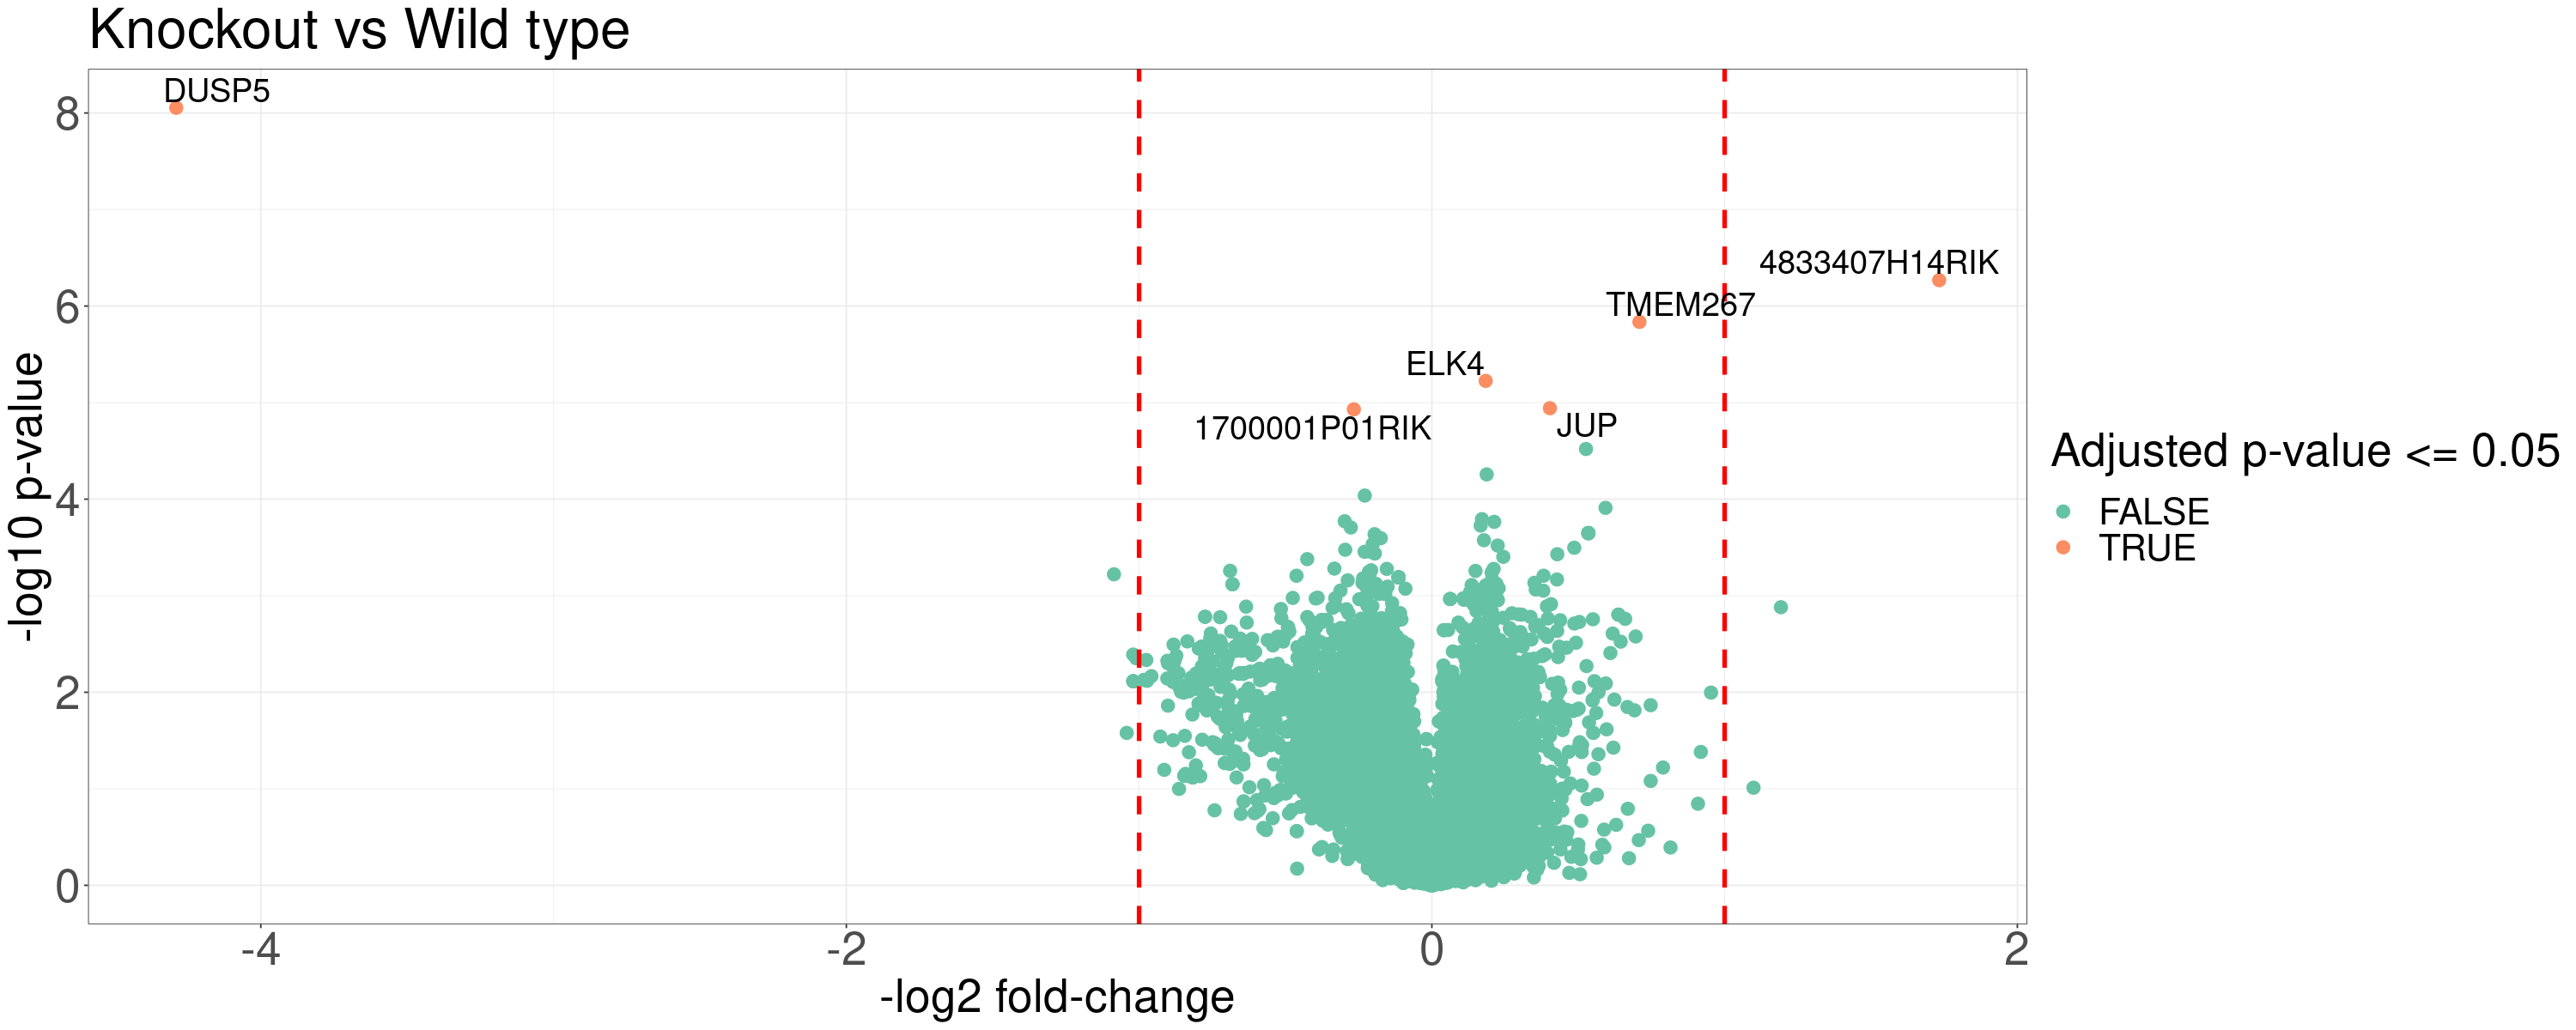

In [8]:
# Select relevant genes to highlight
ko_vs_wt$mlog10PValue  <- -log10(ko_vs_wt$p.value)
relevants <- ko_vs_wt[ko_vs_wt$adjusted.p.value <= 0.05, ]
relevants <- relevants[order(-abs(relevants$mean_diff)), ]
relevants <- relevants[1:25, ]
relevants <- relevants[!is.na(relevants$Gene_symbol), ]

# Volcano plot
options(repr.plot.width=25, repr.plot.height=10)
ko_vs_wt %>% 
    ggplot + 
        geom_point(aes(x = mean_diff, y = mlog10PValue, colour = adjusted.p.value <= 0.05), size = 4) + 
        geom_vline(xintercept = c(-1, 1), linetype="dashed", color = "red", size=1.5) +
        scale_color_brewer(palette="Set2") + 
        theme_bw() +
        theme(text = element_text(size=32),
            axis.text.x = element_text(size=32),
            axis.text.y = element_text(size=32)) +
        geom_text_repel(data = relevants, aes(x = mean_diff, y = mlog10PValue, label = Gene_symbol), size = 8) +
        labs(x = '-log2 fold-change', y = '-log10 p-value', colour = 'Adjusted p-value <= 0.05') +
        labs(title = 'Knockout vs Wild type')

<font size="4"><b>Study the effect of IL-33 (4 hrs)</b></font>

<font size="4">Perform a t-test per gene between population and correct for multiple testing.</font>

In [9]:
# Compute the tests
ut <- expression_data[, grepl('Untreated', colnames(expression_data))]
t <- expression_data[, grepl('IL-33', colnames(expression_data))]
first <- TRUE
for (i in 1:dim(expression_data)[1]) {
  test <- t.test(ut[i, ], t[i, ])
  row <- data.frame(Gene_symbol = expression_data[i, 'Gene_symbol'],
                    p.value = test$p.value,
                    mean_diff = test$estimate[[2]] - test$estimate[[1]])
  if (first) {
    first <- FALSE
    t_vs_ut <- row
    next
  }
  t_vs_ut <- rbind(t_vs_ut, row)
}

# Multiple testing correction
t_vs_ut$adjusted.p.value <- p.adjust(t_vs_ut$p.value, method = 'BH')

# Print the results
head(t_vs_ut)

,Gene_symbol,p.value,mean_diff,adjusted.p.value
,<chr>,<dbl>,<dbl>,<dbl>
1,GNAI3,0.005906667,0.193962950,0.01787113
2,PBSN,0.943360969,-0.004208014,0.96062376
3,CDC45,0.015056910,-0.596311929,0.03859683
4,H19,0.239750105,0.077641251,0.35199731
5,SCML2,0.874923514,-0.006660711,0.91275392
6,APOH,0.005373195,0.200635417,0.01659317


<font size="4">Plot the results.</font>

Warning message:
“ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


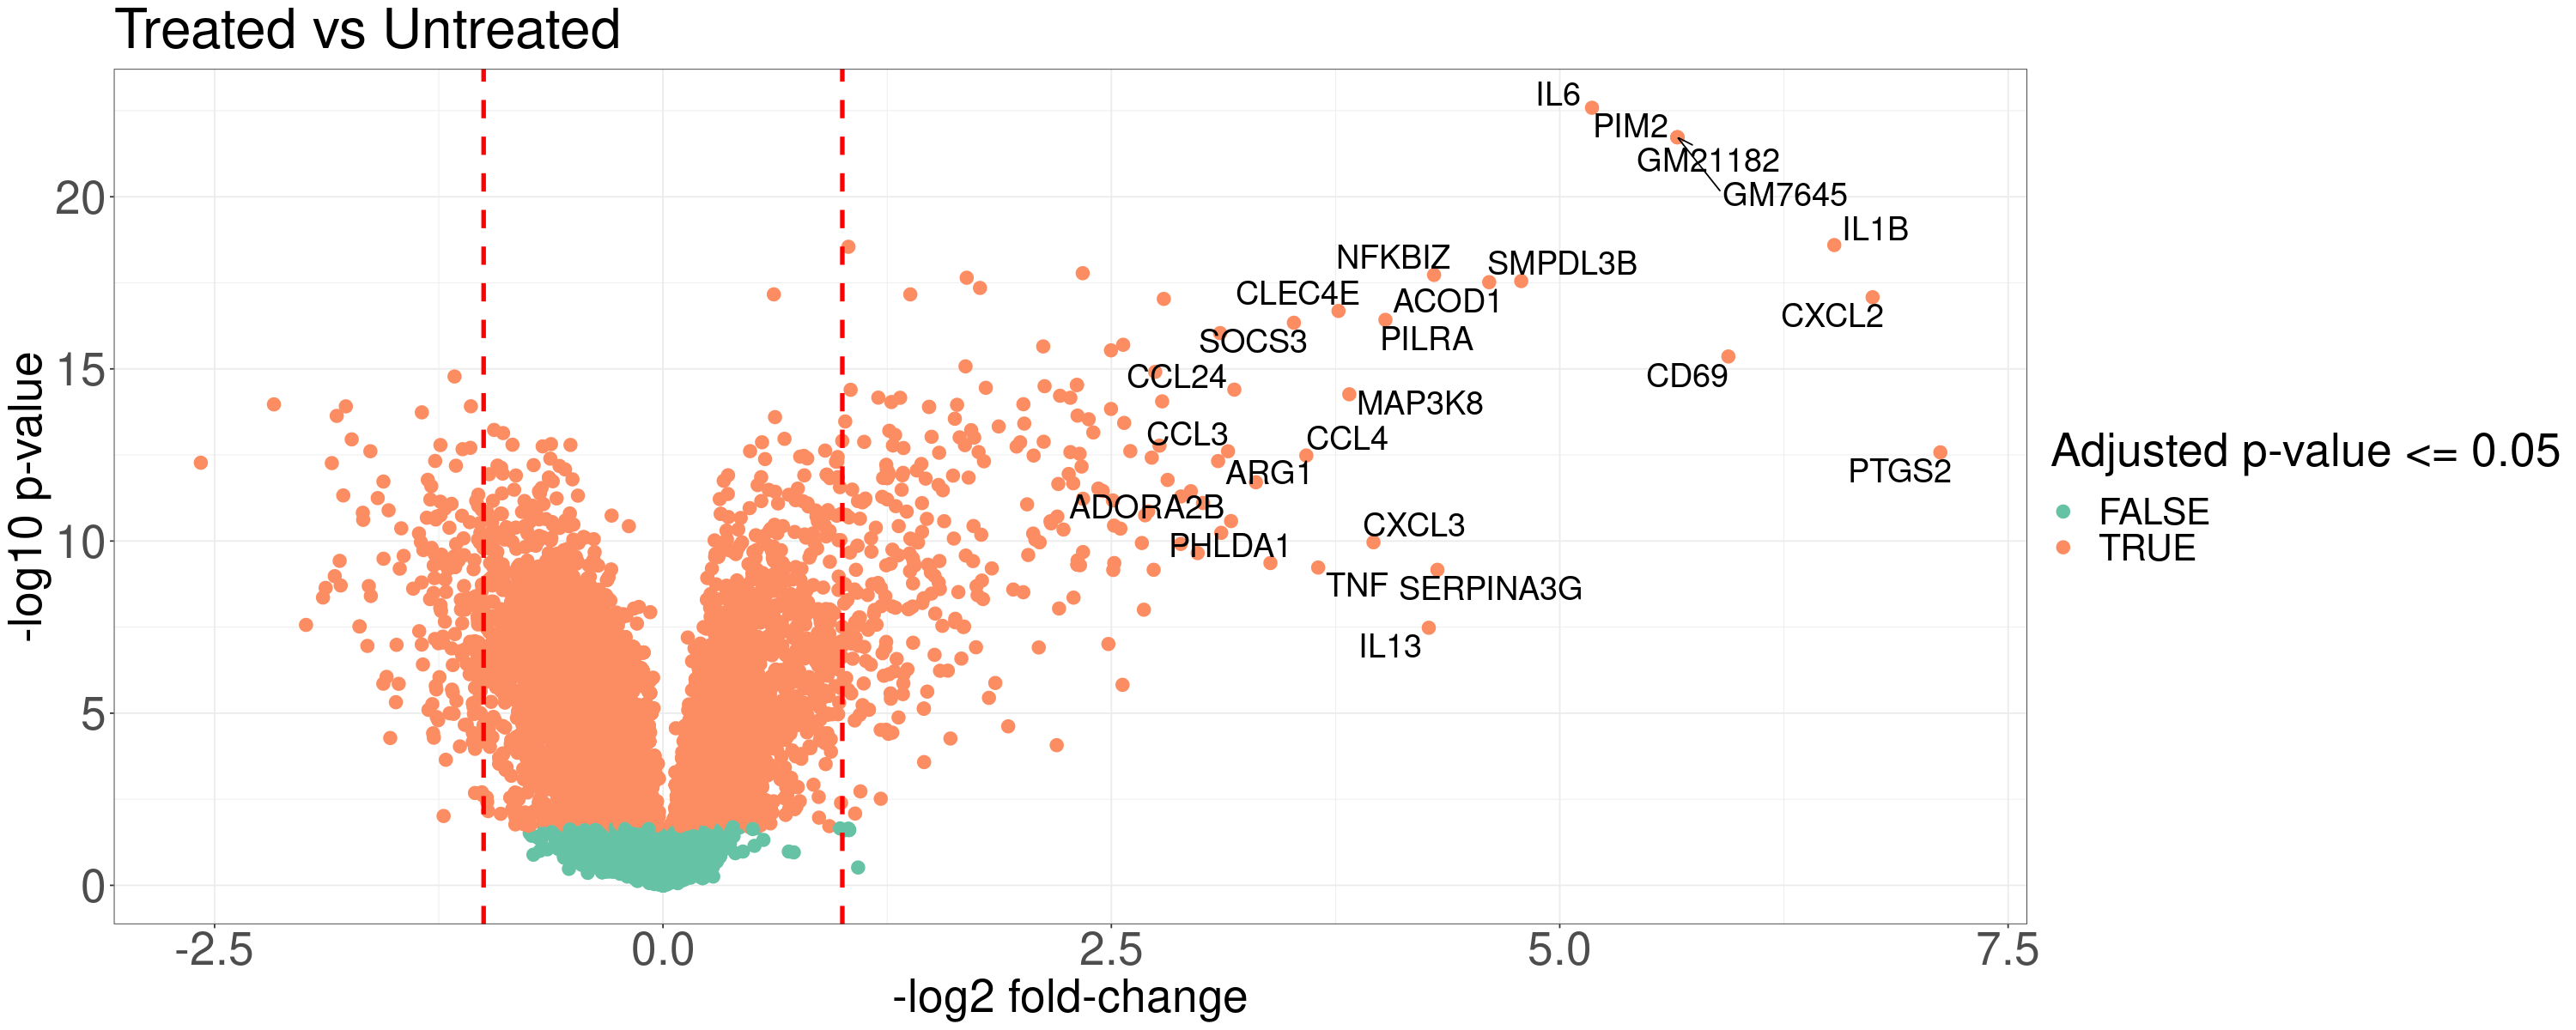

In [10]:
# Select relevant genes to highlight
t_vs_ut$mlog10PValue  <- -log10(t_vs_ut$p.value)
relevants <- t_vs_ut[t_vs_ut$adjusted.p.value <= 0.05, ]
relevants <- relevants[order(-abs(relevants$mean_diff)), ]
relevants <- relevants[1:25, ]
relevants <- relevants[!is.na(relevants$Gene_symbol), ]

# Volcano plot
options(repr.plot.width=25, repr.plot.height=10)
t_vs_ut %>% 
    ggplot + 
        geom_point(aes(x = mean_diff, y = mlog10PValue, colour = adjusted.p.value <= 0.05), size = 4) + 
        geom_vline(xintercept = c(-1, 1), linetype="dashed", color = "red", size=1.5) +
        scale_color_brewer(palette="Set2") + 
        theme_bw() +
        theme(text = element_text(size=32),
            axis.text.x = element_text(size=32),
            axis.text.y = element_text(size=32)) +
        geom_text_repel(data = relevants, aes(x = mean_diff, y = mlog10PValue, label = Gene_symbol), size = 8) +
        labs(x = '-log2 fold-change', y = '-log10 p-value', colour = 'Adjusted p-value <= 0.05') +
        labs(title = 'Treated vs Untreated')

<font size="5"><i>Gense set analysis</i></font>

<font size="4"><b>Over-representation analysis (hypergeometric test)</b></font>

In [11]:
# Read gene sets. Options: biocarta, go, kegg, reactome
gene_sets <- read.gmt('gene_sets/biocarta_gene_sets.gmt')

# Print gene sets
head(gene_sets)

$BIOCARTA_GRANULOCYTES_PATHWAY
 [1] "CXCL8"  "IFNG"   "IL1A"   "CSF3"   "SELP"   "ITGAM"  "ITGAL"  "TNF"   
 [9] "ITGB2"  "PECAM1" "ICAM2"  "C5"     "SELPLG" "ICAM1"  "SELL"  

$BIOCARTA_LYM_PATHWAY
 [1] "CXCL8"   "IL1A"    "MADCAM1" "VCAM1"   "ITGAL"   "CD34"    "ITGB2"  
 [8] "PECAM1"  "ICAM2"   "ITGA4"   "GLYCAM1" "ICAM1"   "ITGB1"   "SELL"   

$BIOCARTA_BLYMPHOCYTE_PATHWAY
 [1] "CD80"     "ITGAL"    "CR1"      "ITGB2"    "CR2"      "CD40"    
 [7] "HLA-DRA"  "HLA-DRB5" "ICAM1"    "FCGR2B"   "PTPRC"    "HLA-DRB1"
[13] "HLA-DRB4" "HLA-DRB3"

$BIOCARTA_CARM_ER_PATHWAY
 [1] "HDAC2"    "HDAC6"    "HDAC4"    "HDAC1"    "NCOR2"    "NRIP1"   
 [7] "BRCA1"    "ESR1"     "NR0B1"    "CARM1"    "HDAC5"    "CREBBP"  
[13] "PHB2"     "GRIP1"    "EP300"    "HDAC3"    "CCND1"    "PPARGC1A"
[19] "SPEN"     "TBP"      "GTF2A1"   "MED1"     "H3C14"    "MEF2C"   
[25] "SRA1"     "PELP1"   

$BIOCARTA_LAIR_PATHWAY
 [1] "CXCL8"  "IL1A"   "SELP"   "KNG1"   "C7"     "VCAM1"  "ITGAL"  "TNF"   
 [9] "ITGB2"  "ITGA4"  "C6"     "C5"     "C3"     "SELPLG" "ICAM1"  "ITGB1" 
[17] "IL6"   

$BIOCARTA_VDR_PATHWAY
 [1] "PRMT1"   "CHAF1A"  "SMARCD1" "HDAC1"   "TSC2"    "SUPT16H" "SMARCC2"
 [8] "CARM1"   "SMARCA4" "COPS2"   "ACTL6A"  "CREBBP"  "NCOR1"   "ARID1A" 
[15] "TOP2B"   "SMARCC1" "EP300"   "VDR"     "KAT2B"   "RXRA"    "NCOA1"  
[22] "MED1"    "SMARCE1" "BAZ1B"

<font size="4">Perform the hypergeometric test upon every gene set</font>

In [12]:
# Obtain differentially expressed genes
differentially_expressed_genes <- t_vs_ut[t_vs_ut$adjusted.p.value <= 0.05, ]$Gene_symbol

# Perform the hypergeometric test
# Genes in the arrays
N <- length(expression_data$Gene_symbol)
# Number of differentiated genes
n <- length(differentially_expressed_genes)  
# Test p-values
hyper.p.values <- c()  
# Number of genes in the set
n_genes_set <- c()
# Number of differentially expressed genes in the set
n_genes_in_the_set <- c()
for (gene_set in gene_sets) {
    # Number of differentially expressed genes in the set
    x <- sum(differentially_expressed_genes %in% gene_set)
    # Number of genes in the set
    k <- length(unlist(gene_set))
    # Compute the test
    p.value <- phyper(x, k, N - k, n, lower.tail = FALSE)
    hyper.p.values <- c(hyper.p.values, p.value)
    # Store results
    n_genes_set <- c(n_genes_set, k)
    n_genes_in_the_set <- c(n_genes_in_the_set, x)
}

# Multiple testing correction
hyper.p.values <- p.adjust(hyper.p.values, 'BH')
hyper_results <- data.frame(gene.set = names(gene_sets),
                            adjusted.p.value = hyper.p.values,
                            n.set = n_genes_set,
                            n.in.set = n_genes_in_the_set)
relevant_hyper_results <- hyper_results[hyper_results$adjusted.p.value <= 0.05, ]

# Print results
relevant_hyper_results

,gene.set,adjusted.p.value,n.set,n.in.set
,<chr>,<dbl>,<int>,<int>
4,BIOCARTA_CARM_ER_PATHWAY,0.0306016181,26,17
11,BIOCARTA_RARRXR_PATHWAY,0.0213906445,7,6
78,BIOCARTA_CIRCADIAN_PATHWAY,0.0352015049,6,5
87,BIOCARTA_DICER_PATHWAY,0.0000000000,5,5
105,BIOCARTA_AKT_PATHWAY,0.0269456533,22,15
111,BIOCARTA_CHEMICAL_PATHWAY,0.0458018627,18,12
113,BIOCARTA_ATM_PATHWAY,0.0499554512,20,13
118,BIOCARTA_RANKL_PATHWAY,0.0356618448,14,10
120,BIOCARTA_CDMAC_PATHWAY,0.0147976909,16,12
